In this snippet, the variation of average cost for two is studied with respect to the rating of the restaurant.<br>
>Talking about the generalisation, by observing the bar plots given below, it is evident that the features have a relationaship noticeable enough.<br>
>As the rating is increasing, we can see that the distribution of the number of restaurants lying in higher costs is increasing.<br>
>For restaurants having a rating between 1.5 and 2, majority of the them have a cost for 2 in range of 500 rupees.<br>
>For restaurants having a rating between 2 and 2.5, majority of the them have a cost for 2 in range of 500 rupees.<br>
>For restaurants having a rating between 2.5 and 3, majority of the them have a cost for 2 in range of 500 rupees.<br>
>For restaurants having a rating between 3 and 3.5, majority of the them have a cost for 2 in range of 500 rupees.<br>
>For restaurants having a rating between 3.5 and 4, majority of the them have a cost for 2 in range of 500 rupees.<br>
>For restaurants having a rating between 4 and 4.5, majority of the them have a cost for 2 in range of 1500 rupees. Here the distribution is more uniform as compared to smaller ratings.<br>
>For restaurants having a rating greater than 4.5, they exhibit similar pattern to the previous category.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/home/shivam/Downloads/zomato.csv',encoding='latin-1')

In [4]:
India = data[data['Country Code']==1]

In [5]:
India.drop(India[India['Average Cost for two']==0].index.values,inplace=True)

/home/shivam/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
def plotGraph(labels,values,i):
    plt.bar(labels,values,edgecolor='black',color='orange')
    plt.xticks(rotation=60)
    plt.xlabel('Cost ranges')
    plt.ylabel('Number of Restaurants')
    plt.title('Aggregate Rating > '+ str(i))
    plt.show()

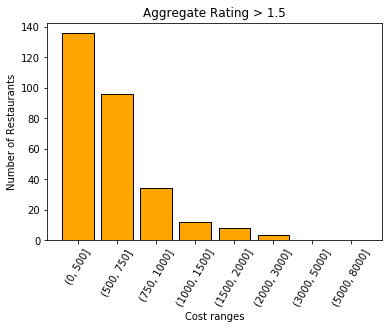

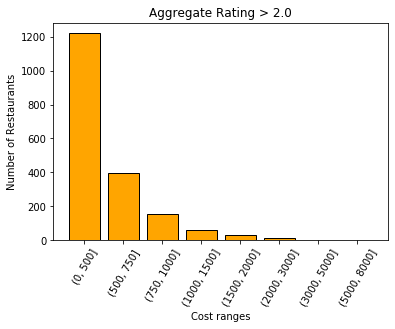

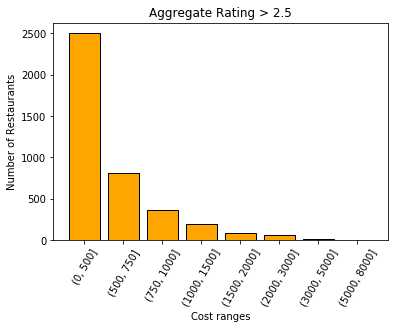

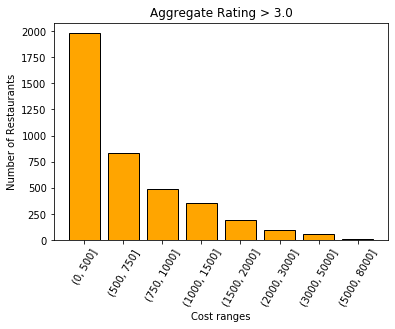

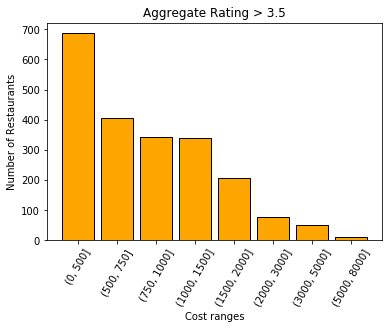

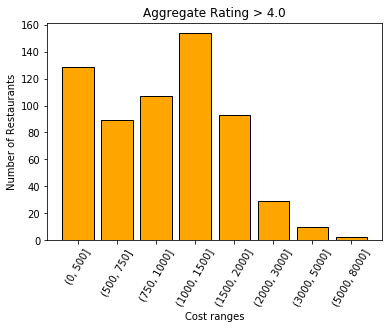

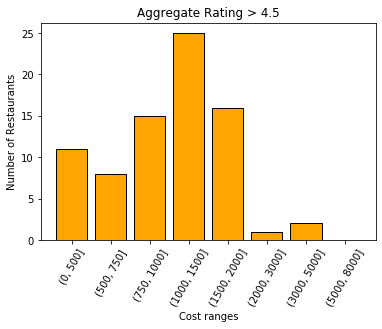

In [58]:
for i in np.arange(1.5,5,0.5):
    Upper = India['Aggregate rating']<=i+1
    Lower = India['Aggregate rating']>i
    temp = India[Upper & Lower]
    Values=temp['Average Cost for two'].value_counts() 
    df = pd.DataFrame(data={'Cost': np.array(Values.index.values), 'Freq': np.array(Values.values)})
    Group = df.groupby(pd.cut(df["Cost"], np.array([0,500,750,1000,1500,2000,3000,5000,8000])))['Freq'].sum()
    Labels=['(0, 500]', '(500, 750]', '(750, 1000]', '(1000, 1500]', '(1500, 2000]', '(2000, 3000]', '(3000, 5000]', '(5000, 8000]']
    plotGraph(Labels,Group.values,i)